### Importing Required Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

### Importing CIFAR10 Dataset

In [14]:
from tensorflow.keras.datasets import cifar10

### Loading Data into Train and Test set

In [15]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [16]:
X_train.shape

(50000, 32, 32, 3)

In [17]:
X_train[0].shape

(32, 32, 3)

### Plotting Images

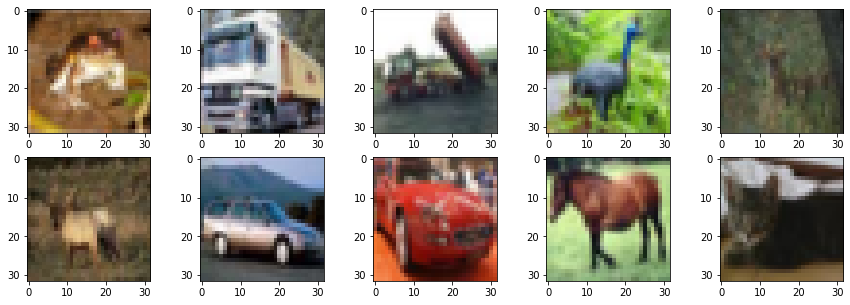

In [18]:
fig,ax = plt.subplots(2,5,figsize=(15,5))
ax[0][0].imshow(X_train[0])
ax[0][1].imshow(X_train[1])
ax[0][2].imshow(X_train[2])
ax[1][0].imshow(X_train[3])
ax[1][1].imshow(X_train[4])
ax[1][2].imshow(X_train[5])
ax[0][3].imshow(X_train[6])
ax[1][3].imshow(X_train[7])
ax[1][4].imshow(X_train[9])
ax[0][4].imshow(X_train[10])
plt.show()

In [19]:
X_train[0].max()

255

In [20]:
X_train = X_train/255

In [21]:
X_test = X_test/255

In [33]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [22]:
X_test.shape

(10000, 32, 32, 3)

### Data Preprocessing

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
y_cat_train = to_categorical(y_train)

In [25]:
y_cat_test = to_categorical(y_test)

### Model Building

In [26]:
from tensorflow.keras.models import Sequential

In [27]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout

In [28]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu'))

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu'))

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
batch_normalization_v1 (Batc (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        32832     
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
__________

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

### Model Training

In [32]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop],batch_size=32)

Train on 50000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
50000/50000 [==============================] - 296s 6ms/sample - loss: 1.5796 - acc: 0.4266 - val_loss: 1.5265 - val_acc: 0.4684
Epoch 2/15
50000/50000 [==============================] - 297s 6ms/sample - loss: 1.2735 - acc: 0.5465 - val_loss: 1.3302 - val_acc: 0.5319
Epoch 3/15
50000/50000 [==============================] - 301s 6ms/sample - loss: 1.1720 - acc: 0.5881 - val_loss: 1.1451 - val_acc: 0.5860
Epoch 4/15
50000/50000 [==============================] - 300s 6ms/sample - loss: 1.1082 - acc: 0.6117 - val_loss: 1.1008 - val_acc: 0.6145
Epoch 5/15
50000/50000 [==============================] - 301s 6ms/sample - loss: 1.0514 - acc: 0.6321 - val_loss: 1.1707 - val_acc: 0.5987
Epoch 6/15
50000/50000 [==============================] - 302s 6ms/sample - loss: 1.0254 - acc: 0.6401 - val_loss: 0.9610 - val_acc: 0.6550
Epoch 7/15
50000/50000 [==============================] - 302s

In [34]:
metrics = pd.DataFrame(model.history.history)

In [35]:
metrics

,loss,acc,val_loss,val_acc
0,1.579555,0.42662,1.526506,0.4684
1,1.273499,0.54646,1.330235,0.5319
2,1.172002,0.58810,1.145083,0.5860
3,1.108186,0.61174,1.100759,0.6145
4,1.051378,0.63206,1.170683,0.5987
5,1.025449,0.64006,0.961037,0.6550
6,0.981137,0.65924,0.880692,0.6941
7,0.963927,0.66436,0.913957,0.6761
8,0.934763,0.67406,0.897726,0.6937


### Plotting Model Traning and Validation Loss

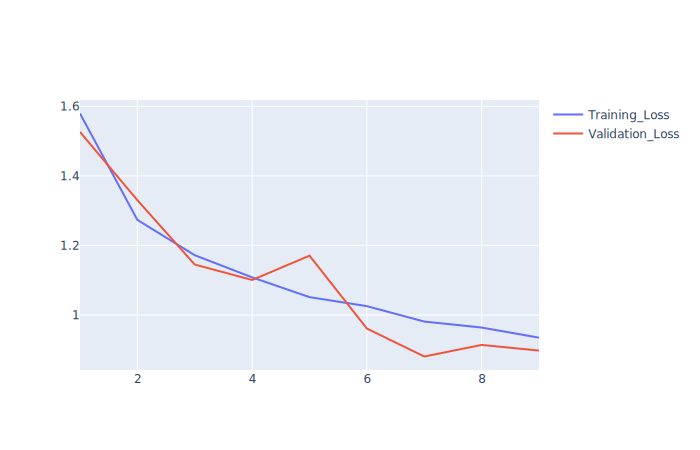

In [36]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6,7,8,9], y=metrics['loss'],
                    mode='lines',
                    name='Training_Loss'))
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6,7,8,9], y=metrics['val_loss'],
                    mode='lines',
                    name='Validation_Loss'))
fig.show("svg")

### Plotting Model Traning and Validation Accuracy

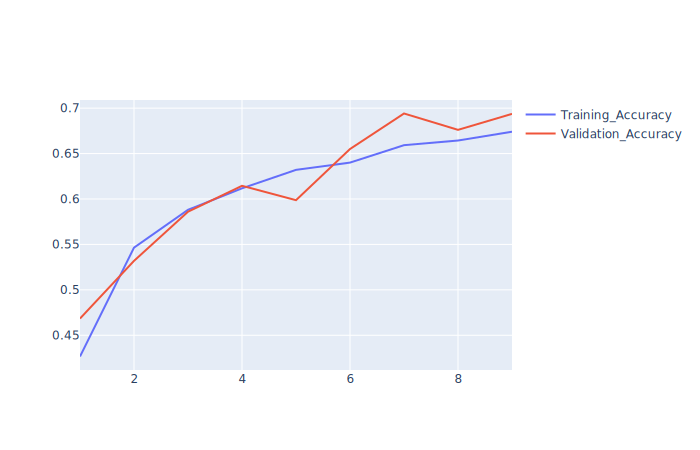

In [37]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6,7,8,9], y=metrics['acc'],
                    mode='lines',
                    name='Training_Accuracy'))
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6,7,8,9], y=metrics['val_acc'],
                    mode='lines',
                    name='Validation_Accuracy'))
fig.show("svg")

### Model Evaluation

In [38]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.8977262105941772, 0.6937]

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
predictions = model.predict_classes(x_test)

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.65      0.72      1000
           1       0.88      0.80      0.84      1000
           2       0.58      0.58      0.58      1000
           3       0.42      0.69      0.52      1000
           4       0.64      0.70      0.67      1000
           5       0.67      0.50      0.57      1000
           6       0.69      0.85      0.76      1000
           7       0.85      0.69      0.76      1000
           8       0.83      0.77      0.80      1000
           9       0.87      0.71      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.72      0.69      0.70     10000
weighted avg       0.72      0.69      0.70     10000



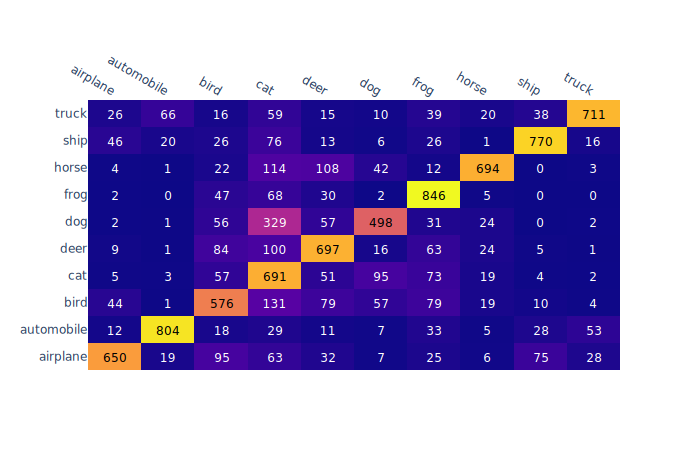

In [43]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
import plotly.figure_factory as ff
fig = ff.create_annotated_heatmap(confusion_matrix(y_test,predictions),x=labels,y=labels)
fig.show("svg")          

In [44]:
my_image = x_test[16]

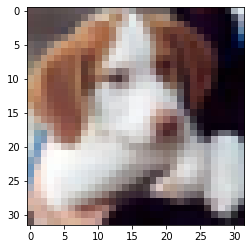

In [45]:
plt.imshow(my_image)

In [46]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([5], dtype=int64)